Code preliminaries

In [2]:
import  os

import numpy as np
import pandas as pd


from create_df import read_df
df, dfc, all_homes, appliance_min, national_average = read_df()

df = df.rename(columns={'house_num_rooms':'num_rooms',
                        'num_occupants':'total_occupants',
                        'difference_ratio_min_max':'ratio_difference_min_max'})
K_min, K_max = 1,6
F_min, F_max=1,8

from all_functions import *
from features_larger import *

In [2]:
appliance="hvac"
month=6
all_homes = df['%s_%d' %(appliance, month)].dropna().index

Selecting a small subset of the data.

In [5]:
subset = dfc

In [6]:
cols_to_use = []
for appliance in ["hvac","fridge","wm"]:
    if appliance=="hvac":
        start, end=5, 11
    else:
        start, end = 1, 13
    cols_to_use.append(['%s_%d' %(appliance, month) for month in range(start, end)])
cols_to_use.append(['%s_%d' %("aggregate", month) for month in range(1, 13)])
#cols_to_use.append(["num_rooms", "total_occupants"])

In [7]:
cols_to_use = [item for sublist in cols_to_use for item in sublist]

In [8]:
all_appliance_cols = cols_to_use[:30]

In [9]:
cols_to_use[:3], all_appliance_cols

(['hvac_5', 'hvac_6', 'hvac_7'],
 ['hvac_5',
  'hvac_6',
  'hvac_7',
  'hvac_8',
  'hvac_9',
  'hvac_10',
  'fridge_1',
  'fridge_2',
  'fridge_3',
  'fridge_4',
  'fridge_5',
  'fridge_6',
  'fridge_7',
  'fridge_8',
  'fridge_9',
  'fridge_10',
  'fridge_11',
  'fridge_12',
  'wm_1',
  'wm_2',
  'wm_3',
  'wm_4',
  'wm_5',
  'wm_6',
  'wm_7',
  'wm_8',
  'wm_9',
  'wm_10',
  'wm_11',
  'wm_12'])

In [10]:
subset = subset[cols_to_use]

Considering only the HVAC consumption from these few homes

In [11]:
subset.describe()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,fridge_1,fridge_2,fridge_3,fridge_4,...,aggregate_3,aggregate_4,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,aggregate_11,aggregate_12
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,39.000000,39.000000,39.000000,39.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,158.938312,394.731252,418.543534,503.712252,344.977110,124.250184,37.988821,35.617923,41.812693,42.541745,...,565.264049,577.191914,788.890174,1161.024399,1207.521609,1330.295674,1064.581407,736.393389,617.617184,747.570538
std,147.729963,329.279774,339.378704,414.348513,279.132655,114.857595,35.571962,32.135668,36.077134,35.856208,...,379.405489,391.891084,480.768216,605.347160,615.111160,710.365529,546.442839,428.424072,381.066786,472.254783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.098808,11.348095,7.798635,0.000000,63.881317,32.462639,0.000000,0.020613,0.016618,0.015011,...,316.652176,318.717125,442.595581,775.728241,833.823441,865.529205,688.730423,420.233849,355.991211,420.527969
50%,154.668854,439.072815,453.963562,529.920044,334.938568,92.407898,37.543854,36.004795,41.930347,43.794926,...,494.090698,533.218079,708.234283,1124.865295,1084.645813,1296.214355,999.998444,634.357056,550.226807,659.034576
75%,251.457565,607.507339,639.048218,821.370117,551.240784,189.920582,51.959431,46.152903,57.225239,58.154238,...,721.655899,722.790665,1049.414124,1489.701416,1589.932953,1773.821960,1437.387604,1039.638519,766.847092,880.760132
max,671.812927,1293.008301,1381.521118,1527.756836,1223.983643,532.721130,175.031464,158.016693,174.532288,176.310059,...,2247.744629,2197.657227,2350.590332,2997.533936,2817.802002,2910.157227,2607.297119,2232.633057,2173.439209,2903.376953


Normalising each column to be on the range (0, 1)

In [14]:
col_max = subset.max()
col_min = subset.min()

In [15]:
col_max.head()

hvac_5     671.812927
hvac_6    1293.008301
hvac_7    1381.521118
hvac_8    1527.756836
hvac_9    1223.983643
dtype: float64

Seems to be working great. All the numbers are in the range(0, 1). Now, doing this for the entire matrix.

In [21]:
subset_normalised = subset.copy()
for col in subset.columns:
    subset_normalised[col] = (subset[col]-col_min[col])/(col_max[col]-col_min[col])

In [22]:
subset_normalised.head()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,fridge_1,fridge_2,fridge_3,fridge_4,...,aggregate_3,aggregate_4,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,aggregate_11,aggregate_12
26,0.376472,0.482955,0.462943,0.537909,0.475800,0.493917,0.000000,0.000000,0.000000,0.000000,...,0.178803,0.228114,0.413600,0.486989,0.488341,0.595911,0.550552,0.467304,0.334352,0.280095
94,0.052607,0.091775,0.093724,0.058084,0.085072,0.048063,0.276088,0.257313,0.273277,0.283062,...,0.186578,0.173204,0.183069,0.196133,0.228794,0.159812,0.225863,0.182223,0.155979,0.109183
252,0.052607,0.091775,0.093724,0.058084,0.085072,0.048063,NaN,NaN,NaN,NaN,...,0.552013,0.630419,1.000000,1.000000,0.802607,0.776210,0.702984,0.592530,0.507486,0.385579
370,0.410206,0.631038,0.603438,0.765337,0.639739,0.626534,0.275147,0.289044,0.273937,0.264916,...,0.336442,0.350839,0.554256,0.637071,0.691564,0.913404,0.753696,0.611511,0.443862,0.262485
410,0.217151,0.355479,0.370264,0.385638,0.272380,0.191135,0.153433,0.154970,0.159210,0.198220,...,0.104859,0.123668,0.183205,0.258609,0.315839,0.342962,0.261907,0.199071,0.153964,0.186778


Employing matrix factorisation now

In [23]:
import numpy
def matrix_factorization(R, P, Q, K, steps=500, alpha=0.0002, beta=0.02):
    numpy.random.seed(0)

    Q = Q.T
    for step in xrange(steps):
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j]>0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in xrange(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in xrange(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

Choosing K=2 latent features

In [25]:
for K in range(1, 2):
    print K
    prediction = {}
    for count, home in enumerate(subset_normalised.index.values[:]):

        print home, count, len(subset_normalised.index)
        subset_normalised_copy = subset_normalised.copy()
        subset_normalised_copy.ix[home][all_appliance_cols]=np.NAN
        R = subset_normalised_copy.values
        N = len(R)
        M = len(R[0])

        P = numpy.random.rand(N,K)
        Q = numpy.random.rand(M,K)

        nP, nQ = matrix_factorization(R, P, Q, K)
        pred_df = pd.DataFrame(numpy.dot(nP, nQ.T), index=subset_normalised.index, columns=subset_normalised.columns)

        pred = {}
        for col in all_appliance_cols:
            pred[col] = (col_max[col]-col_min[col])*pred_df.ix[home][col] + col_min[col]
        prediction[home] = pred
    prediction_overall = pd.DataFrame(prediction).T
    prediction_overall.to_csv("../data/output/mf_new_%d.csv" %K)

 1
26 0 66
94 1 66
252 2 66
370 3 66
410 4 66
545 5 66
624 6 66
871 7 66
1169 8 66
1283 9 66
1334 10 66
1642 11 66
1800 12 66
1953 13 66
2129 14 66
2156 15 66
2233 16 66
2242 17 66
2470 18 66
2814 19 66
2829 20 66
2925 21 66
2986 22 66
3224 23 66
3367 24 66
3456 25 66
3482 26 66
3723 27 66
3778 28 66
3967 29 66
4505 30 66
4732 31 66
4767 32 66
4957 33 66
5218 34 66
5357 35 66
5371 36 66
5439 37 66
5746 38 66
5785 39 66
5814 40 66
5817 41 66
6072 42 66
6139 43 66
6266 44 66
6636 45 66
6836 46 66
6910 47 66
7016 48 66
7429 49 66
7510 50 66
7731 51 66
7741 52 66
7769 53 66
7850 54 66
7866 55 66
8317 56 66
8626 57 66
9052 58 66
9499 59 66
9609 60 66
9654 61 66
9922 62 66
9933 63 66
9934 64 66
9982 65 66


In [29]:
a= {}
for K in range(1,2):
    prediction_overall = pd.read_csv("../data/output/mf_new_%d.csv" %K, index_col=0)
    gt_overall = subset[all_appliance_cols]
    appliance_accuracy ={}
    for appliance in ["hvac","fridge","wm"]:
    #for appliance in ["hvac"]:
        appliance_cols = [col for col in all_appliance_cols if appliance in col]
        gt = gt_overall[appliance_cols]
        pr = prediction_overall[appliance_cols]
        error = (gt-pr).abs()
        per_error = error/gt
        per_error[per_error>1]=1
        per_accuracy = 100*(1-per_error)
        appliance_accuracy[appliance]=per_accuracy.median().median()
        a[K]=appliance_accuracy

In [30]:
%matplotlib inline

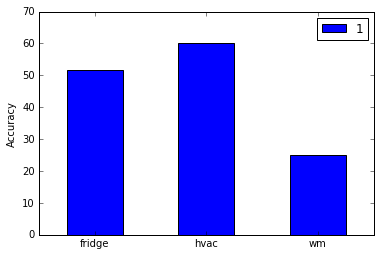

In [31]:
import matplotlib.pyplot as plt
pd.DataFrame(a).plot(kind="bar",rot=0,legend=True)
plt.ylabel("Accuracy")

In [202]:
per_accuracy.median().median()

51.60486639197259

In [100]:
gt_overall = subset[all_appliance_cols]

In [136]:
appliance_accuracy ={}
#for appliance in ["hvac","fridge","wm"]:
for appliance in ["hvac"]:
    appliance_cols = [col for col in all_appliance_cols if appliance in col]
    gt = gt_overall[appliance_cols]
    pr = prediction_overall[appliance_cols]
    error = (gt-pr).abs()
    per_error = error/gt
    per_error[per_error>1]=1
    per_accuracy = 100*(1-per_error)
    appliance_accuracy[appliance]=per_accuracy.mean().mean()
    

In [134]:
gt_overall['fridge_1'].dropna().describe()

count     69.000000
mean      49.725839
std       26.091730
min        0.000400
25%       36.670815
50%       47.795067
75%       54.734383
max      196.560455
Name: fridge_1, dtype: float64

In [138]:
per_accuracy.describe()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,48.620832,59.347882,55.700367,59.125063,59.544016,52.778607
std,35.866989,34.667128,32.088596,31.597226,31.486567,34.565091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.848216,32.710384,42.398268,43.542319,19.402305
50%,60.122247,74.105983,66.911682,71.047190,71.054043,61.591358
75%,78.434722,87.521689,81.044316,82.362428,84.454519,82.102202
max,98.153783,99.983375,98.703433,99.840635,98.872071,99.946246


In [135]:
appliance_accuracy

{'fridge': 57.33235037184128,
 'hvac': 55.852794524403635,
 'wm': 32.64264145040134}

Great, our method predicts energy usage to be 790 units when true consumption was 760 units. Error of 30 units only, which means the method worked really great here.

Now, I'll try to remove more entries from the matrix. Specifically, I'll remove an entry from the same month for a different home. I'll remove the entry for home #1169. Since, this entry is not the lowest one, I don't need to normalise again from scratch. The true energy for this home is ~330 units.

In [21]:
subset_hvac_normalised.loc[1169, 'hvac_7'] = np.NAN

Confirming that we have only 2 missing values in the matrix.

In [26]:
assert(subset_hvac_normalised.isnull().sum().sum()==2)

In [27]:
numpy.random.seed(0)
R = subset_hvac_normalised.values
N = len(R)
M = len(R[0])
K = 2

P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K)

In [28]:
pred_df = pd.DataFrame(numpy.dot(nP, nQ.T), index=subset_hvac_normalised.index, columns=subset_hvac_normalised.columns)

In [29]:
pred_df

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,0.525252,0.546342,0.565182,0.540056,0.470007,0.558244
59,0.195344,0.203010,0.212359,0.204149,0.176959,0.206131
94,0.213187,0.219816,0.252969,0.255115,0.214288,0.210422
101,0.271078,0.280661,0.307573,0.302925,0.258419,0.277217
222,0.849419,0.888274,0.856032,0.785051,0.702246,0.942496
364,0.517585,0.540781,0.527469,0.487283,0.433748,0.570288
545,0.674622,0.699993,0.746862,0.725564,0.624575,0.702636
624,0.134171,0.139255,0.148077,0.143600,0.123757,0.140059
661,0.570436,0.588821,0.668958,0.670553,0.565474,0.568465
871,0.204926,0.213444,0.216974,0.205323,0.179850,0.220218


In [30]:
pred_1169_7 = pred_df.loc[1169, 'hvac_7']

In [31]:
(col_max['hvac_7']-col_min['hvac_7'])*pred_1169_7 + col_min['hvac_7']

320.40357004031023

We predict the usage to be 320 units when the actual consumption is about 330 units. Again, fairly good recommendation!

Now, making the matrix much more sparse. 

In [48]:
subset_hvac_sparse = subset_hvac.copy()

In [49]:
for col in subset_hvac_sparse.columns:
    for row in subset_hvac_sparse.index:
        if numpy.random.random()>0.6:
            subset_hvac_sparse.loc[row, col]=np.NaN

In [51]:
subset_hvac_sparse.isnull().sum().sum()

35

We now have 35 missing entries in the marix.

Month wise #missing entries is 

In [53]:
subset_hvac_sparse.isnull().sum()

hvac_5     7
hvac_6     5
hvac_7     3
hvac_8     6
hvac_9     8
hvac_10    6
dtype: int64

Home wise #missing entries is

In [55]:
subset_hvac_sparse.isnull().sum(axis=1).describe()

count    14.000000
mean      2.500000
std       1.506397
min       0.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
dtype: float64

In [56]:
subset_hvac_sparse

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,242.395737,543.781433,NaN,902.418823,NaN,NaN
59,NaN,NaN,457.950378,NaN,NaN,NaN
94,NaN,66.621819,126.121681,NaN,92.979385,33.392750
101,191.965454,NaN,462.708923,NaN,350.491455,NaN
222,NaN,NaN,NaN,NaN,887.044739,NaN
364,236.925064,535.010376,736.468933,850.080811,642.858459,378.799713
545,350.414551,NaN,1065.381104,1120.907593,NaN,375.303040
624,NaN,NaN,307.978149,389.598602,NaN,22.099518
661,221.594315,648.794067,NaN,NaN,756.477905,NaN
871,84.128731,231.698425,403.408813,514.838928,NaN,140.866745


Now, normalising this matrix.

In [57]:
col_max = subset_hvac_sparse.max()
col_min = subset_hvac_sparse.min()

In [58]:
subset_hvac_sparse_normalised = subset_hvac_sparse.copy()
for col in subset_hvac.columns:
    subset_hvac_sparse_normalised[col] = (subset_hvac_sparse[col]-col_min[col])/(col_max[col]-col_min[col])

In [59]:
subset_hvac_sparse_normalised

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,0.594350,0.819619,NaN,0.458692,NaN,NaN
59,NaN,NaN,0.282465,NaN,NaN,NaN
94,NaN,0.000000,0.000000,NaN,0.000000,0.026268
101,0.404966,NaN,0.286515,NaN,0.324296,NaN
222,NaN,NaN,NaN,NaN,1.000000,NaN
364,0.573806,0.804553,0.519550,0.411879,0.692486,0.829691
545,1.000000,NaN,0.799531,0.654120,NaN,0.821558
624,NaN,NaN,0.154803,0.000000,NaN,0.000000
661,0.516233,1.000000,NaN,NaN,0.835572,NaN
871,0.000000,0.283553,0.236037,0.112021,NaN,0.276255


In [60]:
numpy.random.seed(0)
R = subset_hvac_sparse_normalised.values
N = len(R)
M = len(R[0])
K = 2

P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K)

In [61]:
pred_df = pd.DataFrame(numpy.dot(nP, nQ.T), index=subset_hvac_normalised.index, columns=subset_hvac_normalised.columns)

In [62]:
pred_df

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,0.626751,0.725728,0.574429,0.507956,0.723713,0.715155
59,0.446145,0.471976,0.372976,0.255860,0.509112,0.500437
94,0.166016,0.232958,0.184941,0.231032,0.197225,0.197316
101,0.331219,0.432536,0.343024,0.384554,0.389111,0.387425
222,0.801248,0.779461,0.614957,0.297987,0.905082,0.885557
364,0.650821,0.702224,0.555131,0.405750,0.744536,0.732676
545,0.817796,0.958538,0.758860,0.690261,0.945887,0.935392
624,0.121631,0.140518,0.111219,0.097817,0.140404,0.138725
661,0.642869,0.870370,0.690618,0.819481,0.759418,0.757931
871,0.283462,0.285528,0.225425,0.128576,0.321522,0.315180


Now, let us pick up a few entries. Home #59 had 4/5 missing entries!

In [69]:
home_pred = {}
home = 59
home_pred[home] = {}
for month in range(5, 11):
    home_pred[59][month] = (col_max['hvac_%d' %month]-col_min['hvac_%d' %month])*pred_df.loc[home,'hvac_%d'%month] +col_min['hvac_%d' %month]

In [74]:
pred_59 = pd.DataFrame(home_pred).squeeze()
gt_59 = subset_hvac.ix[59]
gt_59.index=pred_59.index

Here's the GT and prediction for this home. 

In [76]:
pd.DataFrame({"gt":gt_59, "pred":pred_59})

,gt,pred
5,77.613205,202.930850
6,197.951508,341.393123
7,457.950378,564.280025
8,700.443054,675.651405
9,244.340973,497.247409
10,81.064682,237.247047


Given that we had 1/6 records for home #59. Our predictions aren't all that bad.